## TODO

* come poter fare u come prodotto tra vettori?
* condizione per tagliare in automatico il segnale in frames
* OMP? problema dizionario con valori troppo grandi o troppo piccoli

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from pyphysio import EvenlySignal

Please cite:
Bizzego et al. (2019) 'pyphysio: A physiological signal processing library for data science approaches in physiology', SoftwareX


# primo set di parametri

In [85]:
# primo set di parametri per creare il dizionario

# phasic parameters
a = np.array([8, 14, 18]) # steepness of the onset
b = np.array([10, 15, 20]) # recovery
mu = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]) # time shift
# mu in secondi?
#mu = np.divide(mu,fs)
s = np.array([0.100, 0.105, 0.110, 0.115, 0.120, 0.125, 0.130, 0.135, 0.140]) # scale

K2 = len(a)*len(b)*len(mu)*len(s)

# creo un vettore con tutte le permutazioni di a,b,mu,s
phasic_vect = np.array(np.meshgrid(a,b,mu,s)).T.reshape(-1,4)

#######
# rimuovo righe in cui a>b oppure per ogni riga in cui a<b popolo un nuovo vettore
#pv=np.zeros([K2,4])
#for ii in range(0,K2):
#    if phasic_vect[ii,0]<phasic_vect[ii,1]:
#        pv[ii,:]=phasic_vect[ii,:]

# rimuovo righe con zero
#pv = pv[~np.all(pv == 0, axis=1)]
#phasic_vect = pv
##########


# tonic parameters
Gamma = np.array([-20, -10, 1]) # offset
Delta = np.array([-0.01, -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001, 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])

# creo un vettore con tutte le permutazioni di Gamma e Delta
tonic_vect = np.array(np.meshgrid(Gamma,Delta)).T.reshape(-1,2)

K1 = len(Gamma)*len(Delta)

print('Gamma:', len(Gamma), 'Delta:', len(Delta), 'tonic atoms:', K1)
#print('a:', len(a), 'b:', len(b), 'mu:', len(mu), 's:', len(s), 'phasic atoms:', K2, 'phasic atoms with a<b:',len(phasic_vect))
print('a:', len(a), 'b:', len(b), 'mu:', len(mu), 's:', len(s), 'phasic atoms:', K2)
K2 = len(phasic_vect)
K = K1+K2
print('tot atoms:',K)

Gamma: 3 Delta: 21 tonic atoms: 63
a: 3 b: 3 mu: 16 s: 9 phasic atoms: 1296
tot atoms: 1359


# secondo set di parametri

In [69]:
# secondo set di parametri

# phasic parameters
a = np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]) # steepness of the onset
b = np.array([0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]) # recovery
mu = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310]) # time shift
s = np.array([0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14]) # scale

K2 = len(a)*len(b)*len(mu)*len(s)

phasic_vect = np.zeros([K2,4])

# creo un vettore con tutte le permutazioni di a,b,mu,s
phasic_vect = np.array(np.meshgrid(a,b,mu,s)).T.reshape(-1,4)

# rimuovo righe in cui a>b oppure per ogni riga in cui a<b popolo un nuovo vettore
pv=np.zeros([K2,4])
for ii in range(0,K2):
    if phasic_vect[ii,0]<phasic_vect[ii,1]:
        pv[ii,:]=phasic_vect[ii,:]

# rimuovo righe con zero
pv = pv[~np.all(pv == 0, axis=1)]
phasic_vect = pv

# tonic parameters
Gamma = np.array([-20,-10,1]) # offset
Delta = np.array([-0.01,-0.009,-0.008,-0.007,-0.006,-0.005,-0.004,-0.003,-0.002,-0.001,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1])

# creo un vettore con tutte le permutazioni di Gamma e Delta
tonic_vect = np.array(np.meshgrid(Gamma,Delta)).T.reshape(-1,2)

K1 = len(Gamma)*len(Delta)
print('Gamma:', len(Gamma), 'Delta:', len(Delta), 'tonic atoms:', K1)
print('a:', len(a), 'b:', len(b), 'mu:', len(mu), 's:', len(s), 'phasic atoms:', K2, 'phasic atoms with a<b:',len(phasic_vect))
K2 = len(phasic_vect)
K = K1+K2
print('tot atoms:',K)

Gamma: 3 Delta: 21 tonic atoms: 63
a: 19 b: 9 mu: 32 s: 9 phasic atoms: 49248 phasic atoms with a<b: 25920
tot atoms: 25983


In [39]:
# creo un vettore per u per calcolo phi2 per atomi phasic
# se t-mu maggiore di 0 u=1

window_dur_sec = 10 
fs = 32
P = window_dur_sec*fs
t = np.arange(0,P)/fs

u = np.zeros([K2,P])
for row in tqdm(range(0,K2)):
    for col in range(0,P):
        if t[col]-phasic_vect[row,2]>=0:
            u[row,col] = 1
print(u.shape)            

100%|██████████| 1296/1296 [00:00<00:00, 3542.21it/s]

(1296, 320)


In [40]:
# creo il dizionario D

D = np.zeros([K,P])

# popolo D con valori di atomi tonic
for row in range(0,K1):
    D[row,:] = tonic_vect[row,0]+tonic_vect[row,1]*t[:]

# popolo D con valori di atomi phasic
for row in range(K1,K):
    D[row,:] = (np.exp(-phasic_vect[row-K1,1]*(phasic_vect[row-K1,3]*t[:]-phasic_vect[row-K1,2]))-np.exp(-phasic_vect[row-K1,0]*(phasic_vect[row-K1,3]*t[:]-phasic_vect[row-K1,2])))*u[row-K1,:]

D[np.isnan(D)] = 0 # se un valore molto piccolo diventa nan, sostituisco con zero
#D[np.isinf(D)] = 100000 # se un valore molto grande diventa inf, sostituisco con 1000000
#D[D > 100000] = 100000
#D[D < -100000] = -100000

print(tonic_vect.shape)
print(phasic_vect.shape)
print(D.shape)

(63, 2)
(1296, 4)
(1359, 320)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
import sys
np.set_printoptions(suppress=True, threshold=sys.maxsize)
display(D)

100%|██████████| 63/63 [00:00<00:00, 594.03it/s]


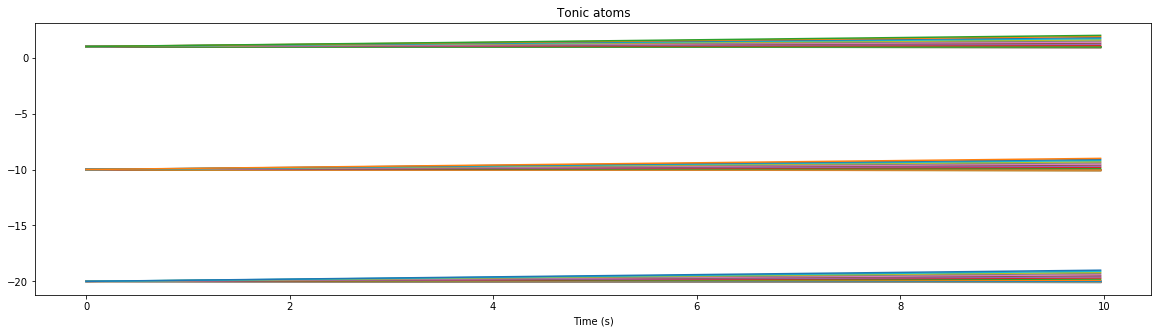

In [41]:
# tonic atoms
plt.figure(figsize=(20,5))
plt.title('Tonic atoms')
plt.xlabel('Time (s)')
for d in tqdm(range(0,K1)):
    plt.plot(t,D[d,:])

100%|██████████| 1233/1233 [00:02<00:00, 610.60it/s]


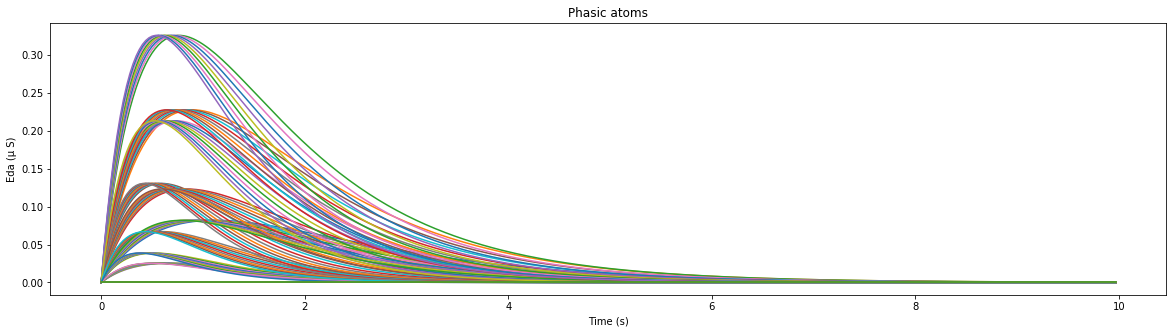

In [42]:
# phasic atoms
plt.figure(figsize=(20,5))
plt.title('Phasic atoms')
plt.xlabel('Time (s)')
plt.ylabel('Eda (\u03BC S)')
for d in tqdm(range(K1,K2)):
    plt.plot(t,np.abs(D[d,:]))

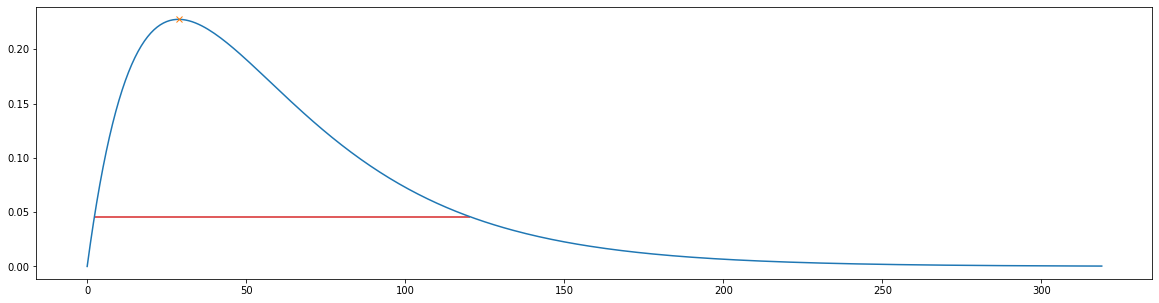

In [172]:
# width di un atomo phasic a caso
x = np.abs(D[64,:])
peaks, _ = find_peaks(x)
plt.figure(figsize=(20,5))
plt.plot(x)
results = peak_widths(x, peaks, rel_height=0.8)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results[1:], color="C3")


In [187]:
from scipy.signal import chirp, find_peaks, peak_widths

width_vector = np.zeros([K2])

for phasic_atom in range(K1,K2):
    x = np.abs(D[phasic_atom,:])
    peaks, _ = find_peaks(x)
    results = peak_widths(x, peaks, rel_height=0.8)
    print(results[0])
    #width_vector[phasic_atom] = results[0]
    

[139.91801619]
[118.10285549]
[106.49347861]
[106.85277497]
[86.47048307]
[75.68164353]
[96.20308923]
[76.44920365]
[66.07707759]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[133.47485852]
[112.56796495]
[101.47209051]
[101.79477673]
[82.34922473]
[72.07931146]
[91.63157293]
[72.81272732]
[62.9289809]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[76.44920365]


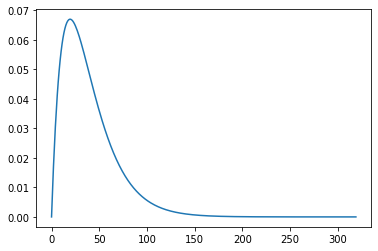

In [151]:
x = np.abs(D[70,:])
plt.plot(x)
peaks, _ = find_peaks(x)
results_full = peak_widths(x, peaks, rel_height=0.8)
print(results_full[0])

In [ ]:
# funzione per normalizzazione, passare segnale e range in cui si vuole normalizzare

def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

D_scaled = scale(D, -1, 1)
D = D_scaled

In [ ]:
# normalizzazione sugli atomi per unit standard deviation

D_scaled = np.zeros([K,P])

D_scaled = (D - D.mean(axis=0)) / D.std(axis=0)
D = D_scaled

In [43]:
# prendo il segnale

data = pd.read_csv('/Users/gioelepozzi/Desktop/PMEmo/code/eda_gram/1_EDA.csv', header=None)

subject = data.loc[0,1] # primo soggetto
signal = [] # vettore con i valori eda del primo soggetto
a = data.iloc[:,1]
for k in range(1,len(a)):
    signal.append(a[k])

# trasformazione del segnale per la libreria    
signal_p = EvenlySignal(values = signal, sampling_freq = fs, signal_type = 'eda')

In [46]:
foo = np.array(signal_p)
foo.shape

(1610,)

In [56]:
# dividere il segnale in frames

foo = np.array(signal_p) # rendo il segnale un numpy array

# aggiungo tanti zeri alla fine per poter dividere in tot frame uguali da 128 l'uno
foo = np.pad(foo, (0, 310), 'constant')
foo = np.split(foo,6)

# senza aggiungere gli zeri in fondo, lasciando quindi l'ultimo frame più piccolo
#a = np.array_split(foo,13) # dimensione ogni frame 135, tranne ultimo 134 13
#b = np.pad(a)

M = np.array(foo)
print(M.shape)

(6, 320)


In [58]:
# prendo il primo frame

x1 = M[0] 
print('first frame:\n', x1)
# selezione prima colonna M[:,0]

P = len(x1)
print('length of the frame: ', P)

first frame:
 [ 8.08407  8.07339  8.0566   8.04592  8.02303  8.00777  7.99862  7.98488
  7.97573  7.96047  7.94521  7.93911  7.92385  7.91012  7.90249  7.89791
  7.88723  7.8735   7.85976  7.85061  7.83993  7.82467  7.81246  7.80025
  7.78652  7.78957  7.77584  7.77431  7.78499  7.78957  7.80483  7.81246
  7.82925  7.85213  7.87655  7.89944  7.92538  7.96047  7.99862  8.03676
  8.07186  8.11916  8.16646  8.21529  8.26259  8.31753  8.36788  8.41366
  8.46249  8.51131  8.56319  8.60744  8.64864  8.69442  8.73104  8.77834
  8.81801  8.85769  8.876    8.91262  8.93703  8.95687  8.97518  8.99959
  9.0118   9.03927  9.05758  9.07284  9.10335  9.11404  9.1354   9.1476
  9.16134  9.18728  9.19338  9.20559  9.23     9.23458  9.25899  9.26967
  9.29104  9.30324  9.33376  9.35055  9.37191  9.39327  9.41921  9.44057
  9.46804  9.47872  9.50008  9.52602  9.56417  9.59011  9.62673  9.65114
  9.68471  9.72286  9.76101  9.7961   9.83578  9.86782  9.9136   9.95785
 10.0036  10.0509  10.1135  10.1669  1

# OMP

In [59]:
DT = D.transpose()

# Dc = x

c = np.zeros(K)

print('DT',DT.shape)
print('c',c.shape)
print('x1',x1.shape)

DT (320, 1359)
c (1359,)
x1 (320,)


In [61]:
# LSQR implementation
# Find the least-squares solution to a large, sparse, linear system of equations

from scipy.sparse.linalg import lsqr

c = lsqr(DT,x1,show=True)

c[0].shape

 
LSQR            Least-squares solution of  Ax = b
The matrix A has      320 rows  and     1359 cols
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =     2718
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   2.637e+02  2.637e+02    1.0e+00  6.6e+00
     1 -2.71490e-02   8.063e+01  8.063e+01    3.1e-01  9.2e-03   1.8e+03  1.0e+00
     2 -5.06353e-01   2.355e+01  2.355e+01    8.9e-02  4.9e-04   1.8e+03  1.0e+02
     3 -5.54083e-01   2.291e+01  2.291e+01    8.7e-02  3.1e-04   1.8e+03  4.9e+02
     4 -5.42993e-01   2.253e+01  2.253e+01    8.5e-02  1.7e-01   1.8e+03  8.4e+02
     5 -4.84894e-01   2.052e+01  2.052e+01    7.8e-02  2.5e-05   2.6e+03  2.5e+03
     6 -2.89564e-01   1.599e+01  1.599e+01    6.1e-02  5.3e-07   2.6e+03  2.5e+04
     7 -2.89564e-01   1.599e+01  1.599e+01    6.1e-02  8.3e-06   2.6e+03  2.5e+04
     8 -2.90618e-01   1.599e

(1359,)

In [62]:
# OMP implementation 1

from sklearn.linear_model import OrthogonalMatchingPursuit

omp = OrthogonalMatchingPursuit(normalize=True,precompute=True).fit(DT, x1)
omp.score(DT, x1)
omp.predict(DT)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


array([ 8.02694168,  8.10900224,  8.11429344,  8.08222032,  8.0374567 ,
        7.99427462,  7.95982155,  7.93656476,  7.92408271,  7.92034891,
        7.92262507,  7.92805789,  7.93405396,  7.93849303,  7.93982369,
        7.93707976,  7.92984323,  7.91817457,  7.90252649,  7.8836513 ,
        7.86250963,  7.84018642,  7.81781595,  7.79651917,  7.77735197,
        7.76126664,  7.7490829 ,  7.74147046,  7.73893917,  7.74183737,
        7.75035618,  7.7645385 ,  7.78429181,  7.80940351,  7.83955802,
        7.87435441,  7.91332442,  7.95595012,  8.00168037,  8.04994647,
        8.10017598,  8.1518054 ,  8.20429075,  8.25711657,  8.30980349,
        8.36191381,  8.4130556 ,  8.46288575,  8.51111125,  8.55748964,
        8.60182833,  8.64398309,  8.68385591,  8.72139209,  8.75657714,
        8.78943311,  8.82001491,  8.84840628,  8.87471601,  8.89907396,
        8.92162726,  8.94253674,  8.96197347,  8.9801156 ,  8.99714533,
        9.01324639,  9.02860159,  9.04339076,  9.05778893,  9.07

In [63]:
omp.score(DT, x1)

0.9991361306973768

In [60]:
# OMP implementation 2

from sklearn.linear_model import orthogonal_mp

omp = orthogonal_mp(DT,x1,precompute=True, return_n_iter=True)

print(omp)

[-5.54132873  0.          0.         ...  0.          0.
  0.        ]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/omp.py:376: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_path=return_path)


In [ ]:
# OMP implementation 3

from sparselandtools.pursuits import OrthogonalMatchingPursuit
from sparselandtools.dictionaries import Dictionary

d = Dictionary(DT)

reg = OrthogonalMatchingPursuit(d, sparsity=1).fit(x1)
z = np.matmul(d.matrix, reg)

In [ ]:
# OMP implementation 4

import omp

npts = 128
domain = np.linspace(0, 1, npts)
y = np.dot(D, x1)

# reconstruct
result = omp.omp(D, y)
print('Solution: %r' % result.coef)

npts = 128
domain = np.linspace(0, 1, npts)
#X = np.array([np.cos(2 * np.pi * m * domain) for m in range(4)]).T
coef = [0., 1., 0., .5]
y = np.dot(D, x1)

plt.figure()
plt.plot(domain, DT)
plt.title('Dictionary atoms')

# reconstruct
result = omp.omp(DT, x1)
print('Solution: %r' % result)